In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/fridge_price.csv')

In [3]:
df

,Brand,Model,Capacity,Energy Rating,Type,Features,Color,Material,Warranty Period,Country of Manufacture,Price
0,Panasonic,Model0,369.0,A++,NaN,NaN,NaN,Stainless Steel,5.0,Germany,1231.0
1,GE,Model1,619.0,A,Side-by-Side,Smart Connectivity,White,Glass,8.0,Germany,267.0
2,GE,Model2,309.0,A,Single Door,Ice Dispenser,Black,Stainless Steel,7.0,India,477.0
3,LG,Model3,662.0,B,Side-by-Side,Ice Dispenser,Gray,Plastic,8.0,India,NaN
4,Bosch,Model4,533.0,B,Double Door,Water Dispenser,Gray,Plastic,NaN,India,993.0
...,...,...,...,...,...,...,...,...,...,...,...
19995,GE,Model19995,303.0,A+,Single Door,NaN,Gray,Glass,4.0,USA,820.0
19996,Siemens,Model19996,412.0,A+,Double Door,Ice Dispenser,Black,Stainless Steel,1.0,China,870.0
19997,Panasonic,Model19997,755.0,A+,Double Door,NaN,Black,Stainless Steel,2.0,China,1720.0
19998,Electrolux,Model19998,NaN,A+,Single Door,Smart Connectivity,White,Plastic,5.0,USA,1551.0


In [4]:
## Cleaning the dataset:

In [5]:
## shape of the dataset:


In [6]:
df.shape

(20000, 11)

In [7]:
## Information of the dataset:

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Brand                   20000 non-null  object 
 1   Model                   19000 non-null  object 
 2   Capacity                19012 non-null  float64
 3   Energy Rating           19000 non-null  object 
 4   Type                    19000 non-null  object 
 5   Features                14226 non-null  object 
 6   Color                   19000 non-null  object 
 7   Material                19000 non-null  object 
 8   Warranty Period         19000 non-null  float64
 9   Country of Manufacture  19000 non-null  object 
 10  Price                   19000 non-null  float64
dtypes: float64(3), object(8)
memory usage: 1.7+ MB


In [9]:
## Description of the dataset:

In [10]:
df.describe()

,Capacity,Warranty Period,Price
count,19012.000000,19000.000000,19000.000000
mean,447.283032,5.022842,1099.181684
std,207.008095,2.575806,518.876706
min,-99.000000,1.000000,200.000000
25%,272.000000,3.000000,649.000000
50%,449.000000,5.000000,1099.000000
75%,626.000000,7.000000,1552.000000
max,799.000000,9.000000,1999.000000


In [11]:
## Checking the null values in dataset:

In [12]:
df.isnull().sum()

,0
Brand,0
Model,1000
Capacity,988
Energy Rating,1000
Type,1000
Features,5774
Color,1000
Material,1000
Warranty Period,1000
Country of Manufacture,1000


In [13]:
numerical_columns = df.select_dtypes(include=['float']).columns

In [14]:
numerical_columns

Index(['Capacity', 'Warranty Period', 'Price'], dtype='object')

In [15]:
categorical_columns = df.select_dtypes(include=['object']).columns

In [16]:
categorical_columns

Index(['Brand', 'Model', 'Energy Rating', 'Type', 'Features', 'Color',
       'Material', 'Country of Manufacture'],
      dtype='object')

In [17]:
## filling the null values in numerical columns:

In [18]:
for i in numerical_columns:
  df[i] = df[i].fillna(df[i].mean())

In [19]:
## filling the null values in numerical columns:

In [20]:
for i in categorical_columns:
  df[i] = df[i].fillna(df[i].mode()[0])

In [21]:
df.isnull().sum()

,0
Brand,0
Model,0
Capacity,0
Energy Rating,0
Type,0
Features,0
Color,0
Material,0
Warranty Period,0
Country of Manufacture,0


In [22]:
df.head()

,Brand,Model,Capacity,Energy Rating,Type,Features,Color,Material,Warranty Period,Country of Manufacture,Price
0,Panasonic,Model0,369.0,A++,Single Door,Smart Connectivity,Silver,Stainless Steel,5.000000,Germany,1231.000000
1,GE,Model1,619.0,A,Side-by-Side,Smart Connectivity,White,Glass,8.000000,Germany,267.000000
2,GE,Model2,309.0,A,Single Door,Ice Dispenser,Black,Stainless Steel,7.000000,India,477.000000
3,LG,Model3,662.0,B,Side-by-Side,Ice Dispenser,Gray,Plastic,8.000000,India,1099.181684
4,Bosch,Model4,533.0,B,Double Door,Water Dispenser,Gray,Plastic,5.022842,India,993.000000


EXPLORATORY DATA ANALYSIS


In [23]:
## Count of the Brand:

In [24]:
df['Brand'].value_counts()

,count
Brand,
GE,2052
Frigidaire,2050
LG,2003
Siemens,1982
Haier,1978
Samsung,1976
Whirlpool,1962
Bosch,1945
Panasonic,1929


In [25]:
df['Brand'].unique()

array(['Panasonic', 'GE', 'LG', 'Bosch', 'Siemens', 'Haier', 'Samsung',
       'Frigidaire', 'Electrolux', 'Whirlpool', 'Br@ndX'], dtype=object)

In [26]:
df['Brand'] = df['Brand'].replace('Br@ndX','BrandX')

In [27]:
df['Brand'].unique()

array(['Panasonic', 'GE', 'LG', 'Bosch', 'Siemens', 'Haier', 'Samsung',
       'Frigidaire', 'Electrolux', 'Whirlpool', 'BrandX'], dtype=object)

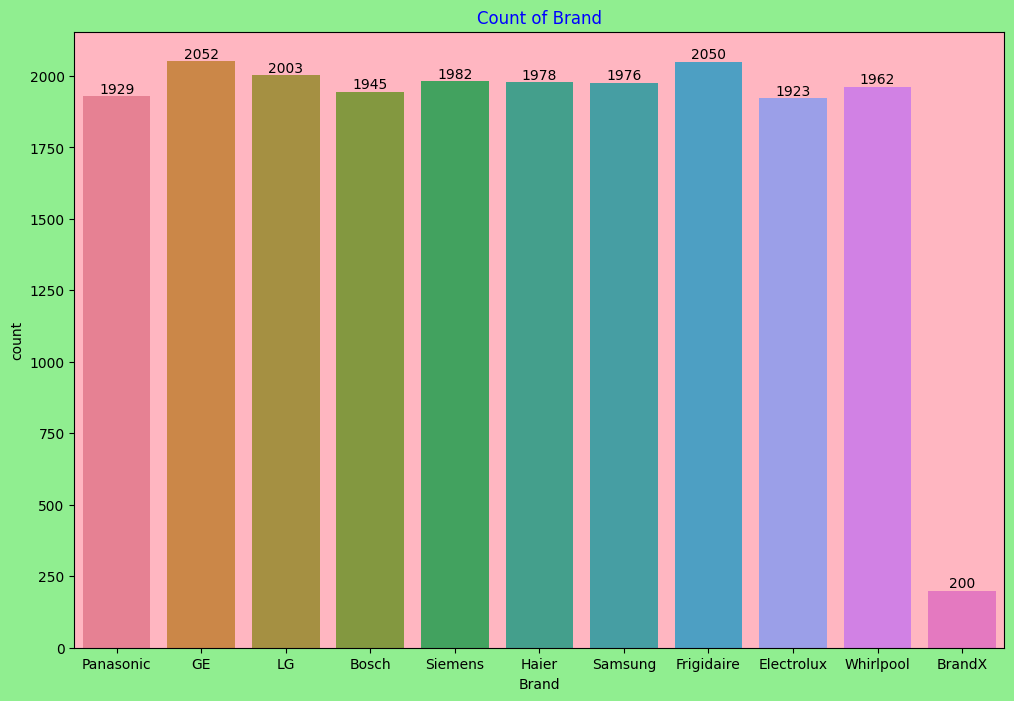

In [28]:
plt.figure(figsize=(12,8))
a = sns.countplot(x='Brand',data=df,hue='Brand')
for i in a.containers:
  plt.bar_label(i)
plt.title('Count of Brand',color='Blue')
a.axes.set_facecolor('lightpink')
plt.gcf().set_facecolor('lightgreen')
plt.show()

In [29]:
## Count of types:

In [30]:
df['Type'].value_counts()

,count
Type,
Single Door,7429
Side-by-Side,6308
Double Door,6263


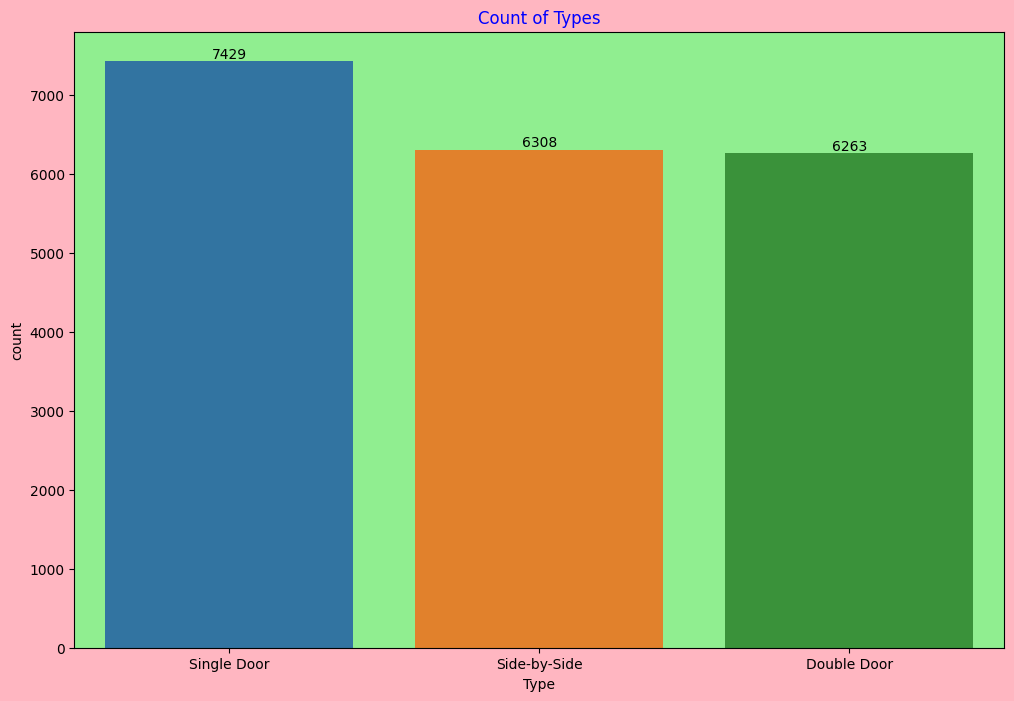

In [31]:
plt.figure(figsize=(12,8))
b = sns.countplot(x='Type',data=df,hue='Type')
for i in b.containers:
  plt.bar_label(i)
plt.title('Count of Types',color='blue')
b.axes.set_facecolor('lightgreen')
plt.gcf().set_facecolor('lightpink')
plt.show()

In [32]:
## Count of features:

In [33]:
df['Features'].value_counts()

,count
Features,
Smart Connectivity,10600
Water Dispenser,4719
Ice Dispenser,4681


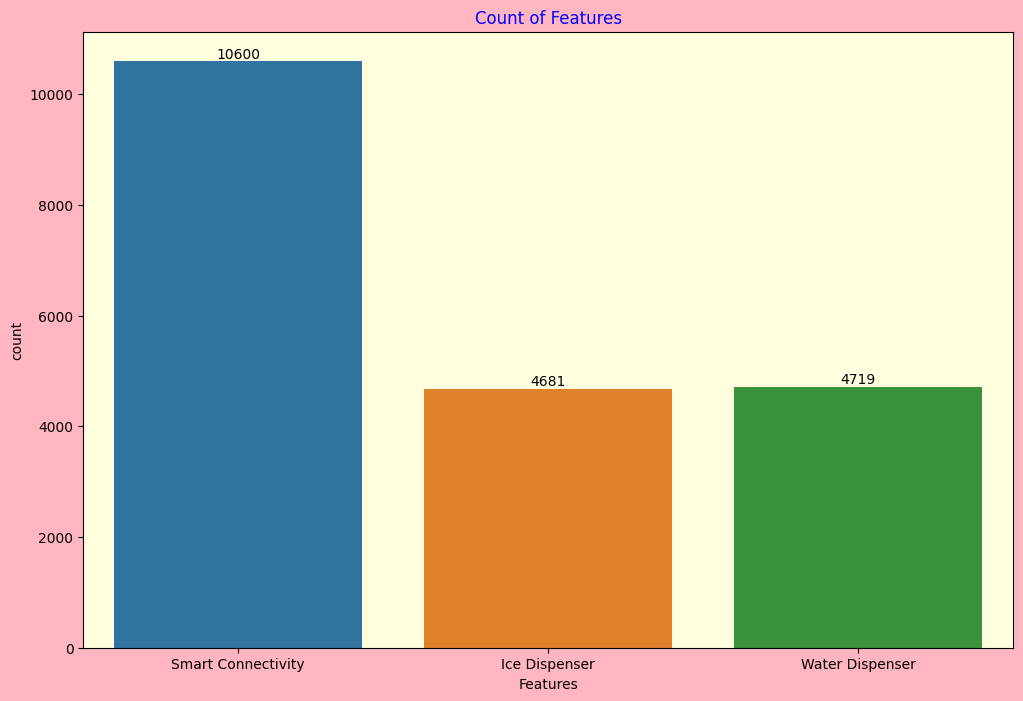

In [34]:
plt.figure(figsize=(12,8))
c = sns.countplot(x='Features',data=df,hue='Features')
for i in c.containers:
  plt.bar_label(i)
plt.title('Count of Features',color='blue')
c.axes.set_facecolor('lightyellow')
plt.gcf().set_facecolor('lightpink')
plt.show()

In [35]:
## Percentage of Features:

In [36]:
d = df['Features'].value_counts()

In [37]:
d

,count
Features,
Smart Connectivity,10600
Water Dispenser,4719
Ice Dispenser,4681


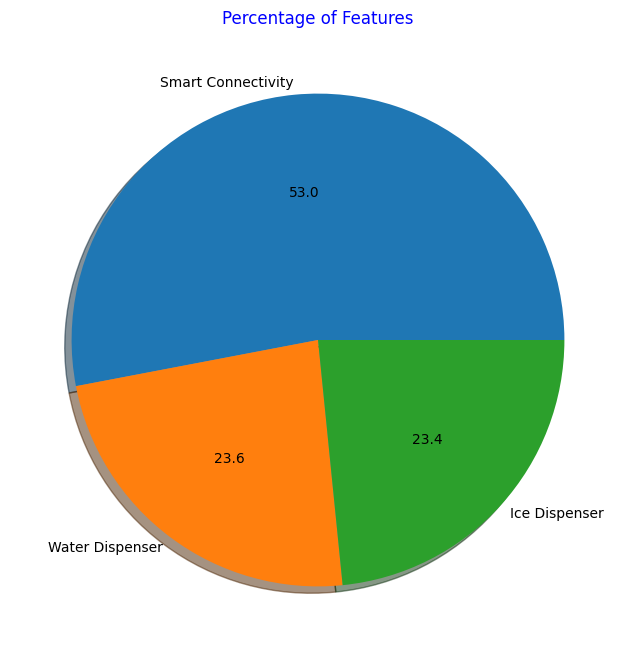

In [38]:
plt.figure(figsize=(12,8))
plt.pie(d.values,labels=d.index,autopct='%.1f',labeldistance=1.05,shadow=True)
plt.title('Percentage of Features',color='blue')
plt.show()

In [39]:
## Count of Color:

In [40]:
df['Color'].value_counts()

,count
Color,
Silver,5846
Gray,4735
White,4724
Black,4695


<ipython-input-41-27978c514be0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  e=sns.countplot(x='Color', data=df, palette='crest')


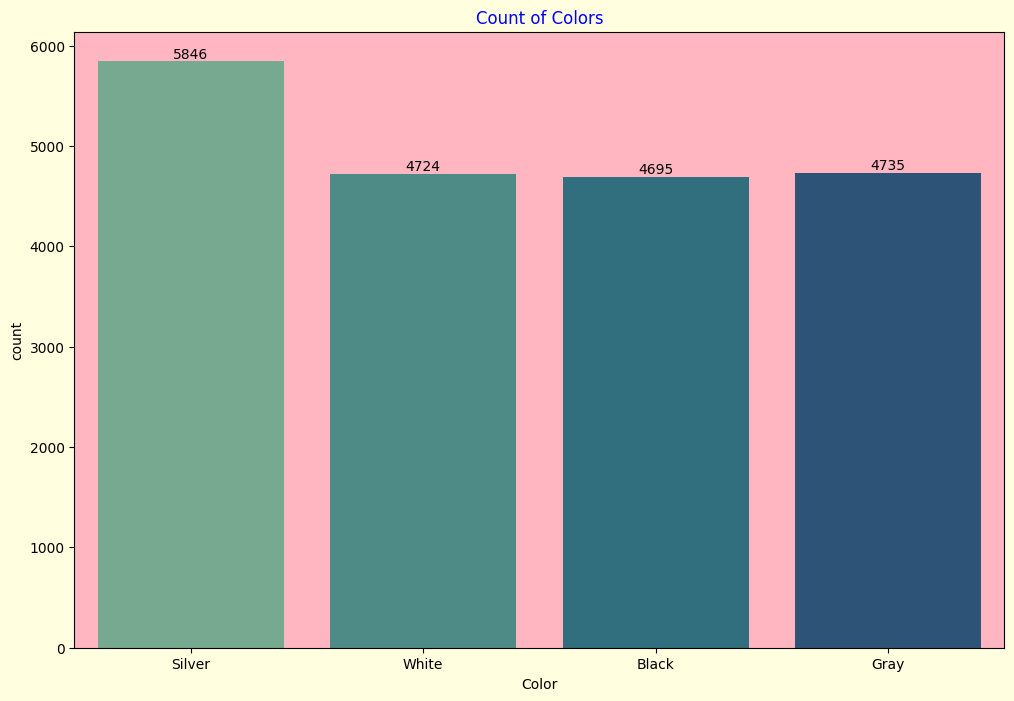

In [41]:
plt.figure(figsize=(12,8))
e=sns.countplot(x='Color', data=df, palette='crest')
for i in e.containers:
  plt.bar_label(i)
plt.title('Count of Colors',color='blue')
e.axes.set_facecolor('lightpink')
plt.gcf().set_facecolor('lightyellow')
plt.show()


In [42]:
## Pecentage  of Material:

In [43]:
f = df['Material'].value_counts()

In [44]:
f

,count
Material,
Plastic,7422
Glass,6381
Stainless Steel,6197


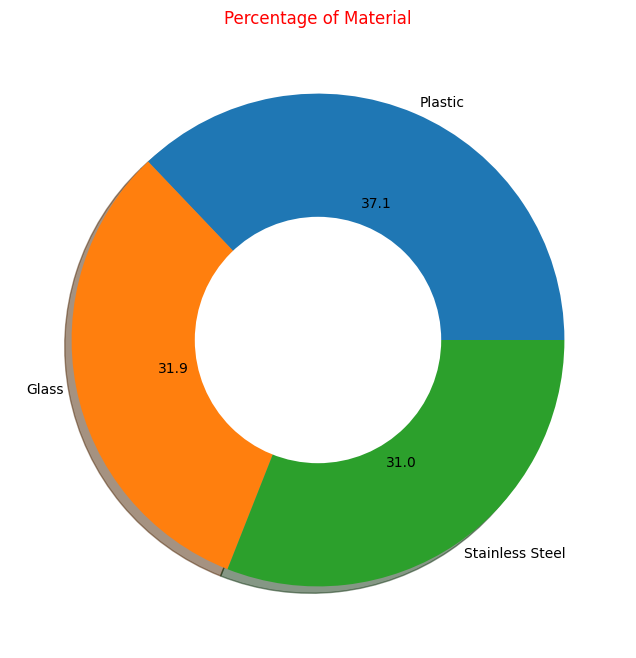

In [45]:
plt.figure(figsize=(12,8))
plt.pie(f.values,labels=f.index,autopct='%.1f',labeldistance=1.05,shadow=True)
center_circle = plt.Circle((0,0),radius=0.50,fc='white')
fig = plt.gcf()
plt.gca().add_artist(center_circle)
plt.title('Percentage of Material',color='red')
plt.show()

In [46]:
## The countries where have been manufactured:

In [47]:
df['Country of Manufacture'].value_counts()

,count
Country of Manufacture,
China,5827
USA,4745
India,4721
Germany,4707


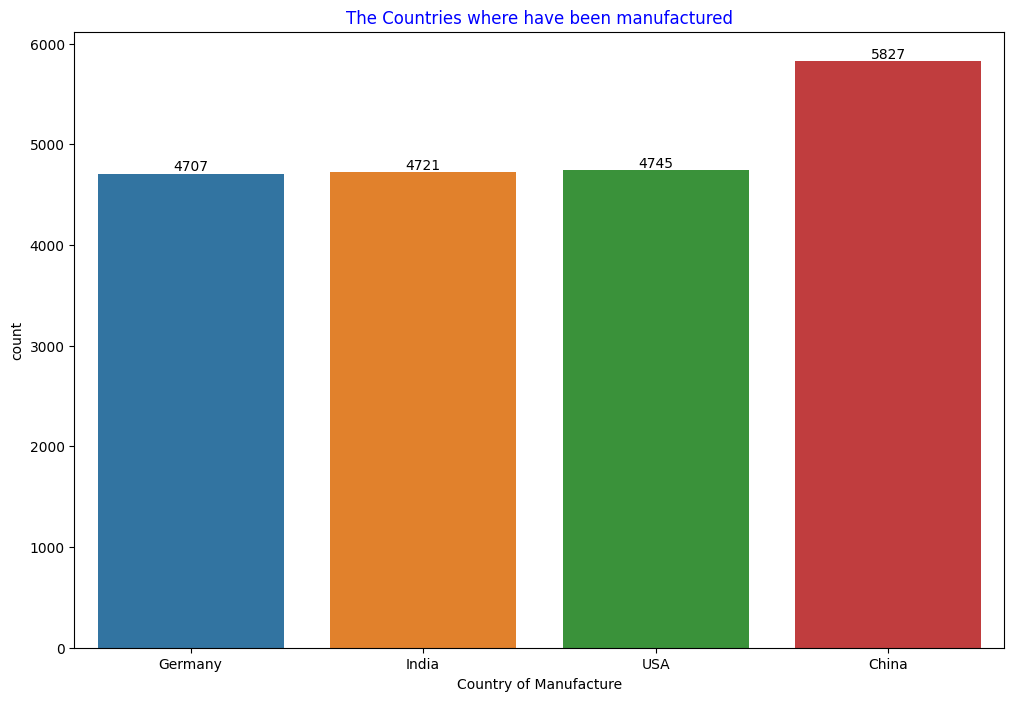

In [48]:
plt.figure(figsize=(12,8))
h = sns.countplot(x='Country of Manufacture',data=df,hue='Country of Manufacture')
for i in h.containers:
  plt.bar_label(i)
plt.title('The Countries where have been manufactured',color='blue')
plt.show()

In [49]:
df.head(5)

,Brand,Model,Capacity,Energy Rating,Type,Features,Color,Material,Warranty Period,Country of Manufacture,Price
0,Panasonic,Model0,369.0,A++,Single Door,Smart Connectivity,Silver,Stainless Steel,5.000000,Germany,1231.000000
1,GE,Model1,619.0,A,Side-by-Side,Smart Connectivity,White,Glass,8.000000,Germany,267.000000
2,GE,Model2,309.0,A,Single Door,Ice Dispenser,Black,Stainless Steel,7.000000,India,477.000000
3,LG,Model3,662.0,B,Side-by-Side,Ice Dispenser,Gray,Plastic,8.000000,India,1099.181684
4,Bosch,Model4,533.0,B,Double Door,Water Dispenser,Gray,Plastic,5.022842,India,993.000000


In [50]:
## Sum of price by Brand:

In [51]:
sum_price_brand = df.groupby('Brand')['Price'].sum().reset_index()

In [52]:
sum_price_brand

,Brand,Price
0,Bosch,2.156912e+06
1,BrandX,2.192755e+05
2,Electrolux,2.086726e+06
3,Frigidaire,2.260386e+06
4,GE,2.251764e+06
5,Haier,2.200261e+06
6,LG,2.201027e+06
7,Panasonic,2.107726e+06
8,Samsung,2.157066e+06
9,Siemens,2.151752e+06


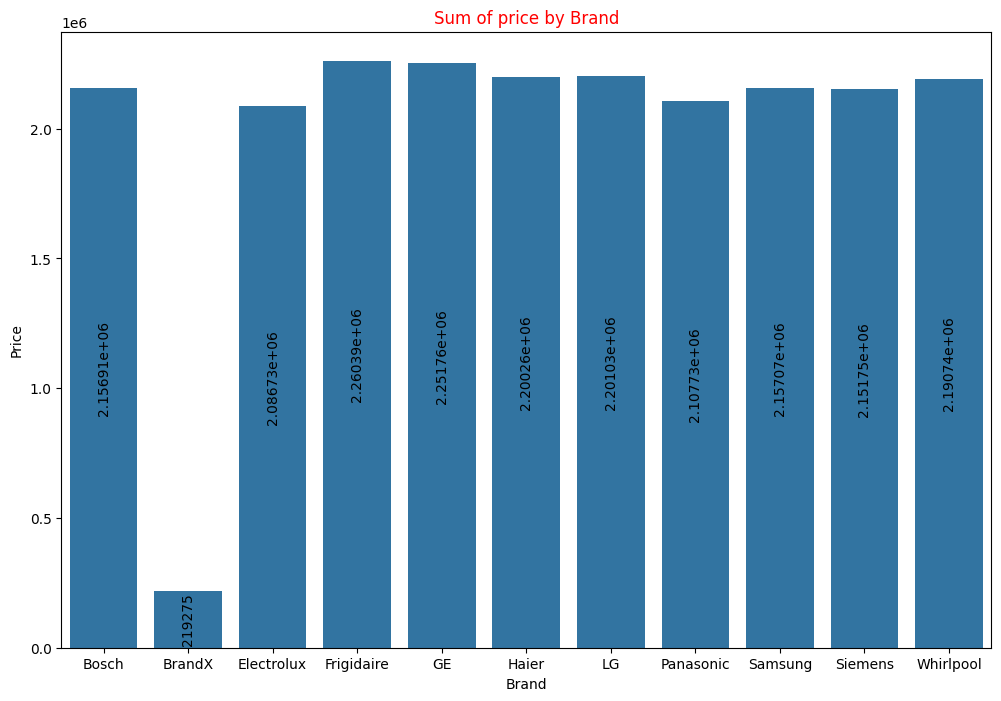

In [53]:
plt.figure(figsize=(12,8))
t = sns.barplot(x='Brand',y='Price',data=sum_price_brand)
for i in t.containers:
  plt.bar_label(i,rotation=90,label_type='center')
plt.title('Sum of price by Brand',color='red')
plt.show()

In [54]:
## Average of Price by Brand:

In [55]:
avg_price_brand = df.groupby('Brand')['Price'].mean().reset_index()
avg_price_brand['Price'] = avg_price_brand['Price'].round(2)

In [56]:
avg_price_brand

,Brand,Price
0,Bosch,1108.95
1,BrandX,1096.38
2,Electrolux,1085.14
3,Frigidaire,1102.63
4,GE,1097.35
5,Haier,1112.37
6,LG,1098.87
7,Panasonic,1092.65
8,Samsung,1091.63
9,Siemens,1085.65


<ipython-input-57-c074bd7a83a4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(x='Brand',y='Price',data=avg_price_brand,palette='crest')


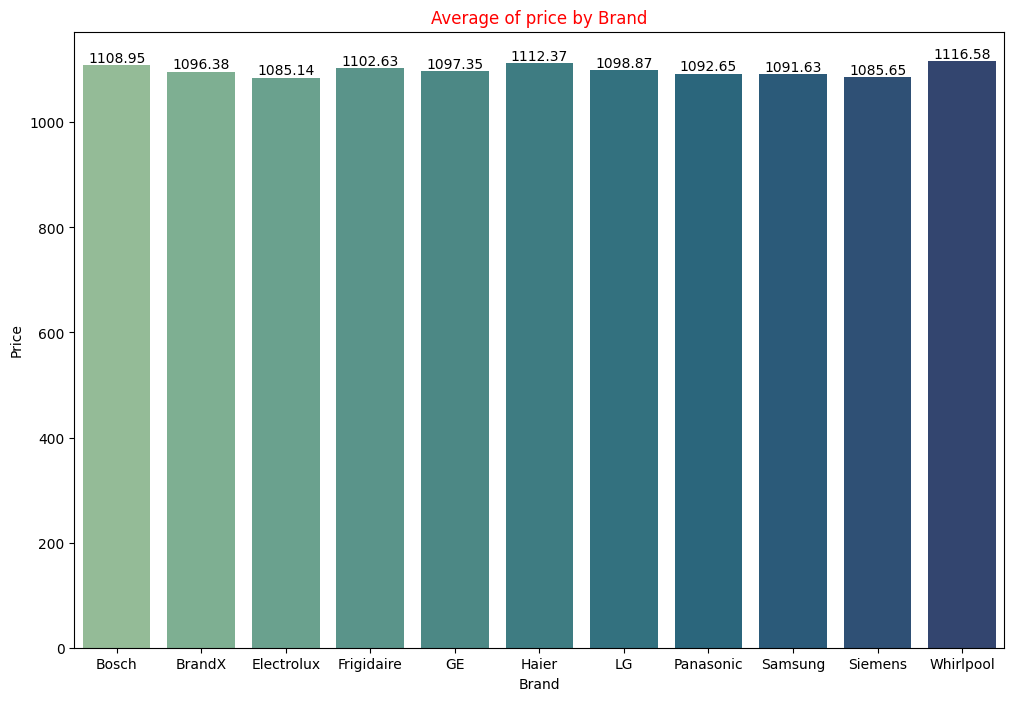

In [57]:
plt.figure(figsize=(12,8))
g = sns.barplot(x='Brand',y='Price',data=avg_price_brand,palette='crest')
for i in g.containers:
  plt.bar_label(i)
plt.title('Average of price by Brand',color='red')
plt.show()


In [58]:
## Average price by features:

In [59]:
ave_price_feature = df.groupby('Features')['Price'].mean().reset_index()
ave_price_feature['Price'] = ave_price_feature['Price'].round(2)

In [60]:
ave_price_feature

,Features,Price
0,Ice Dispenser,1107.21
1,Smart Connectivity,1101.31
2,Water Dispenser,1086.43


<ipython-input-61-af520666f9f2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  s = sns.barplot(x='Features',y='Price',data=ave_price_feature,palette='crest')


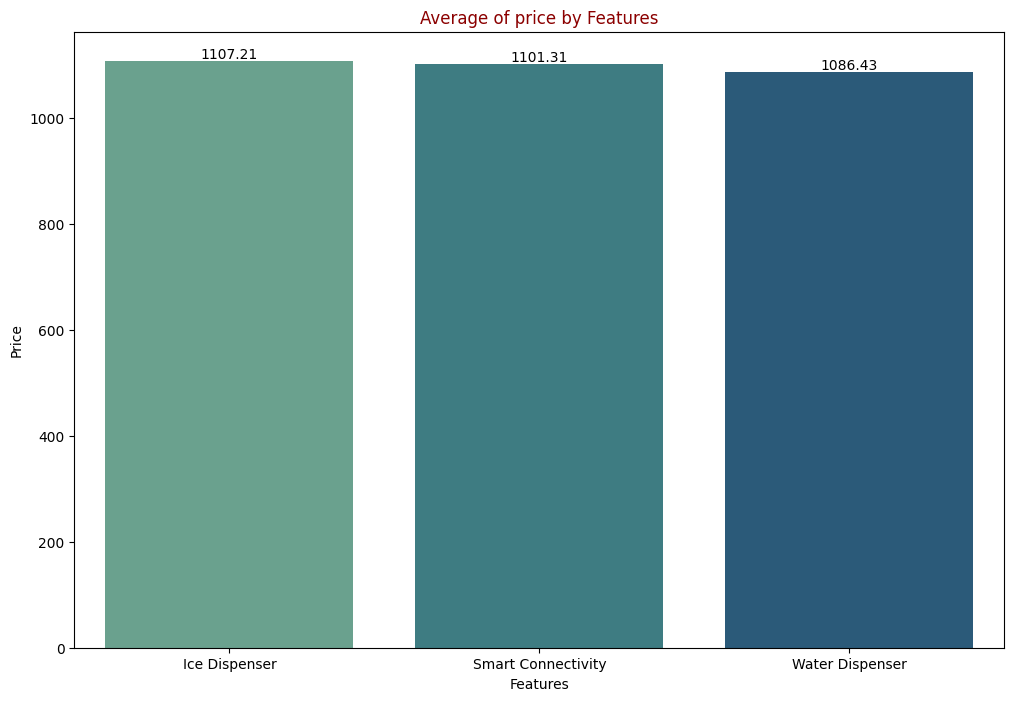

In [61]:
plt.figure(figsize=(12,8))
s = sns.barplot(x='Features',y='Price',data=ave_price_feature,palette='crest')
for i in s.containers:
  plt.bar_label(i)
plt.title('Average of price by Features',color='darkred')
plt.show()

In [62]:
## Average price by color:

In [63]:
avg_price_color = df.groupby('Color')['Price'].mean().reset_index()
avg_price_color['Price'] = avg_price_color['Price'].round(2)

In [64]:
avg_price_color

,Color,Price
0,Black,1096.56
1,Gray,1099.37
2,Silver,1110.16
3,White,1088.01


<ipython-input-65-8109333fe9ec>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ai = sns.barplot(x='Color',y='Price',data=avg_price_color,palette='crest')


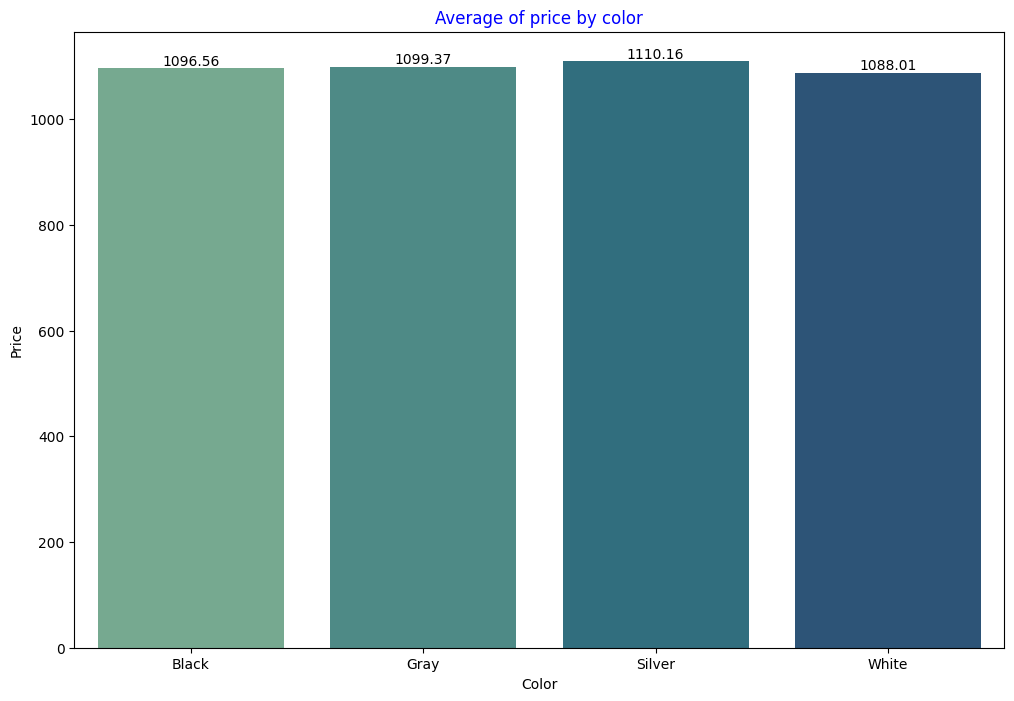

In [65]:
plt.figure(figsize=(12,8))
ai = sns.barplot(x='Color',y='Price',data=avg_price_color,palette='crest')
for i in ai.containers:
  plt.bar_label(i)
plt.title('Average of price by color',color='blue')
plt.show()


In [66]:
# Average of warranty period:

In [67]:
avg_warranty_by_brand = df.groupby('Brand')['Warranty Period'].mean().reset_index()
avg_warranty_by_brand['Warranty Period'] = avg_warranty_by_brand['Warranty Period'].round(2)

In [68]:
avg_warranty_by_brand

,Brand,Warranty Period
0,Bosch,4.96
1,BrandX,5.04
2,Electrolux,5.03
3,Frigidaire,5.03
4,GE,4.95
5,Haier,5.02
6,LG,5.14
7,Panasonic,5.05
8,Samsung,5.05
9,Siemens,5.00


<ipython-input-69-f9d7ed503053>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fi = sns.barplot(x='Brand',y='Warranty Period',data=avg_warranty_by_brand,palette='crest')


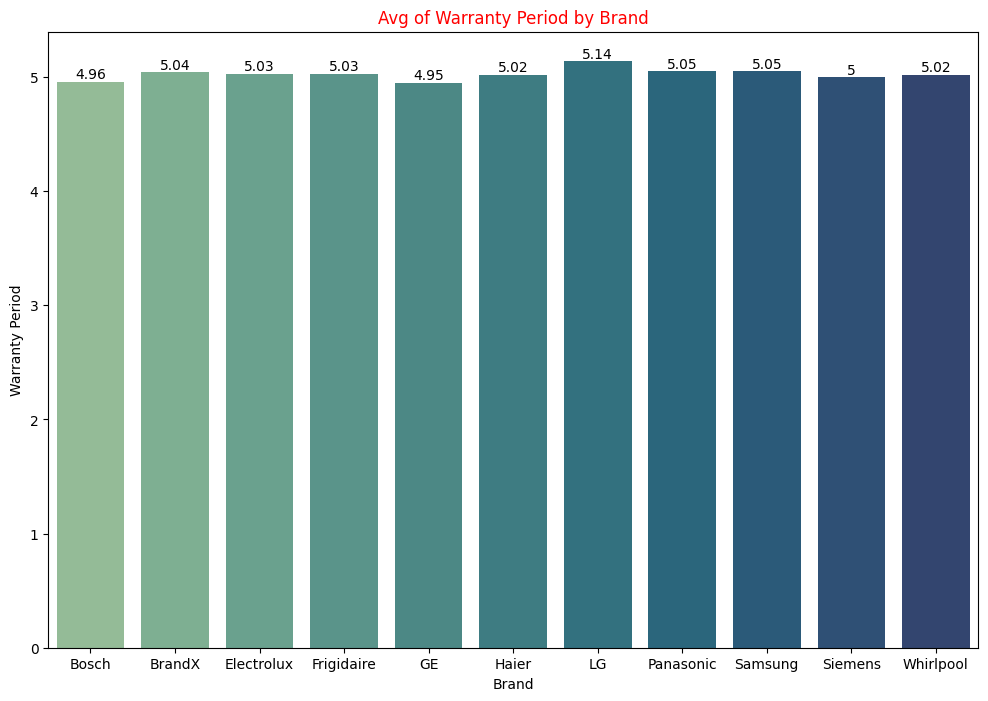

In [69]:
plt.figure(figsize=(12,8))
fi = sns.barplot(x='Brand',y='Warranty Period',data=avg_warranty_by_brand,palette='crest')
for i in fi.containers:
  plt.bar_label(i)
plt.title('Avg of Warranty Period by Brand',color='red')
plt.show()


In [70]:
## Average of Capacity by Brand:

In [71]:
avg_capacity_Brand = df.groupby('Brand')['Capacity'].mean().reset_index()
avg_capacity_Brand['Capacity'] = avg_capacity_Brand['Capacity'].round(2)

In [72]:
avg_capacity_Brand

,Brand,Capacity
0,Bosch,440.34
1,BrandX,446.09
2,Electrolux,446.30
3,Frigidaire,443.97
4,GE,443.85
5,Haier,447.46
6,LG,448.92
7,Panasonic,454.48
8,Samsung,445.21
9,Siemens,450.98


<ipython-input-73-17eb1399a2a7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ri = sns.barplot(x='Brand',y='Capacity',data=avg_capacity_Brand,palette='crest')


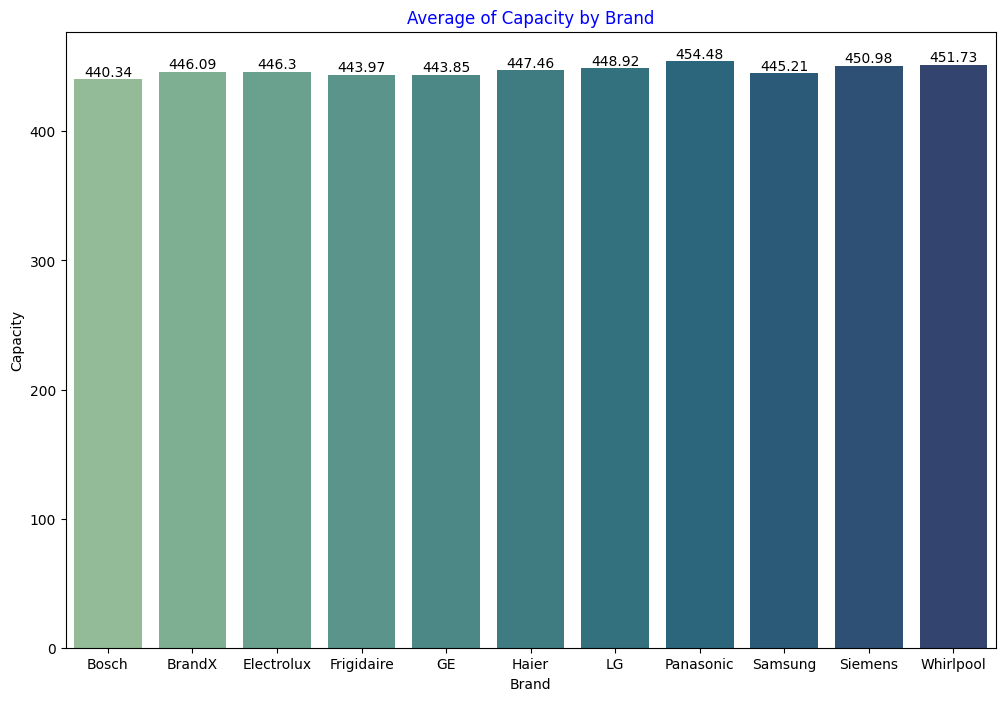

In [73]:
plt.figure(figsize=(12,8))
ri = sns.barplot(x='Brand',y='Capacity',data=avg_capacity_Brand,palette='crest')
for i in ri.containers:
  plt.bar_label(i)
plt.title('Average of Capacity by Brand',color='Blue')
plt.show()

In [74]:
## In which country manufactured the Brands:

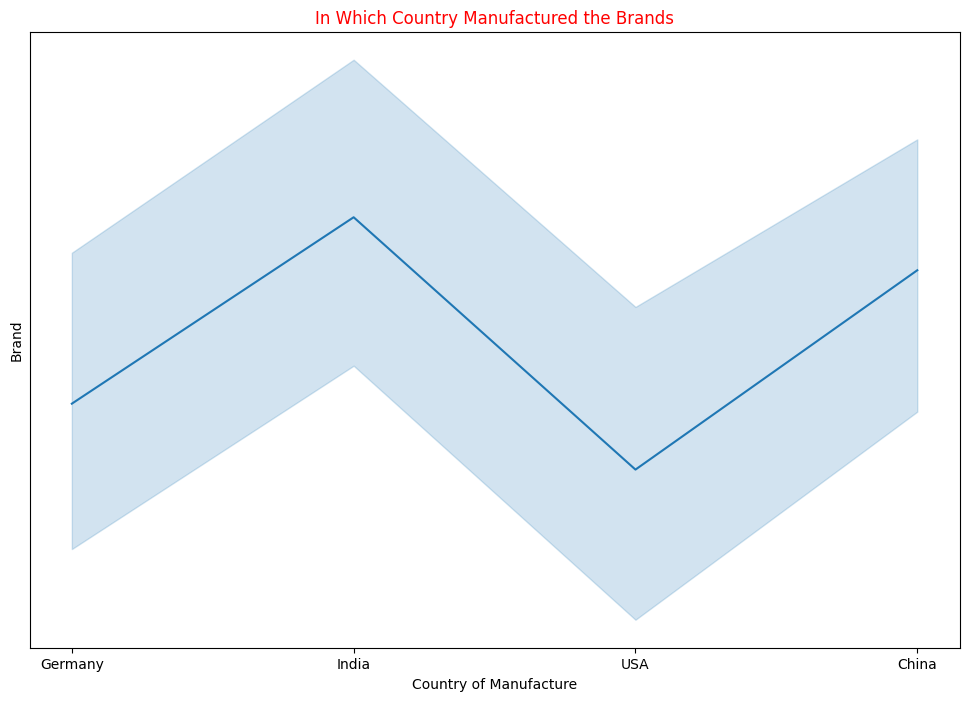

In [75]:
plt.figure(figsize=(12,8))
ti = sns.lineplot(x='Country of Manufacture',y='Brand',data=df)
for i in ti.containers:
  plt.bar_label(i)
plt.title('In Which Country Manufactured the Brands',color='Red')
plt.show()

In [76]:
## Brand by Features:

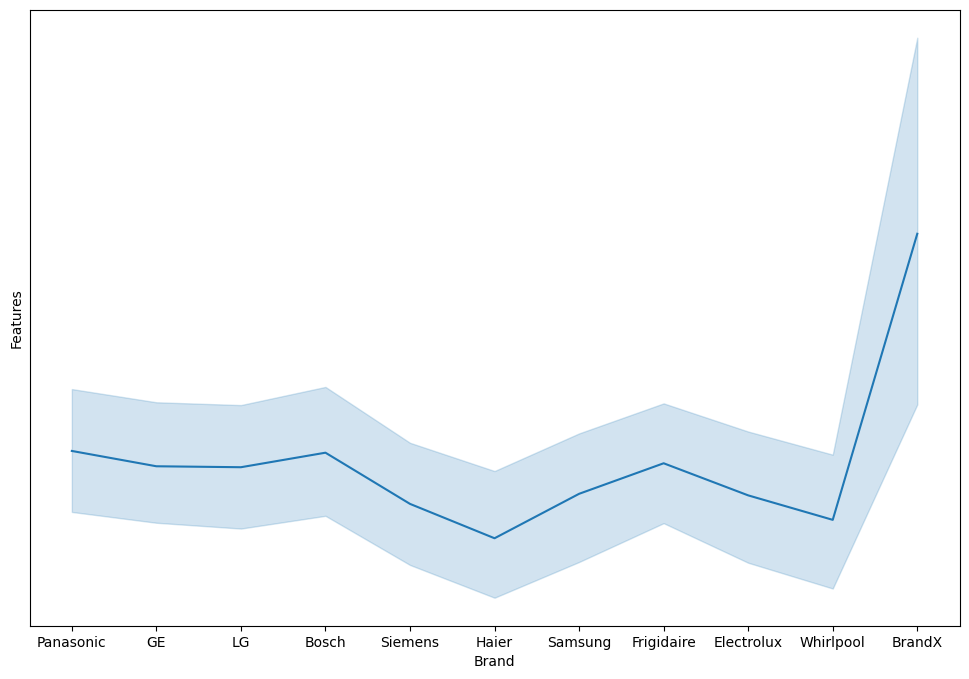

In [77]:
plt.figure(figsize=(12,8))
sns.lineplot(x='Brand',y='Features',data=df)
plt.show()

In [78]:
## Energy rating by Brand:

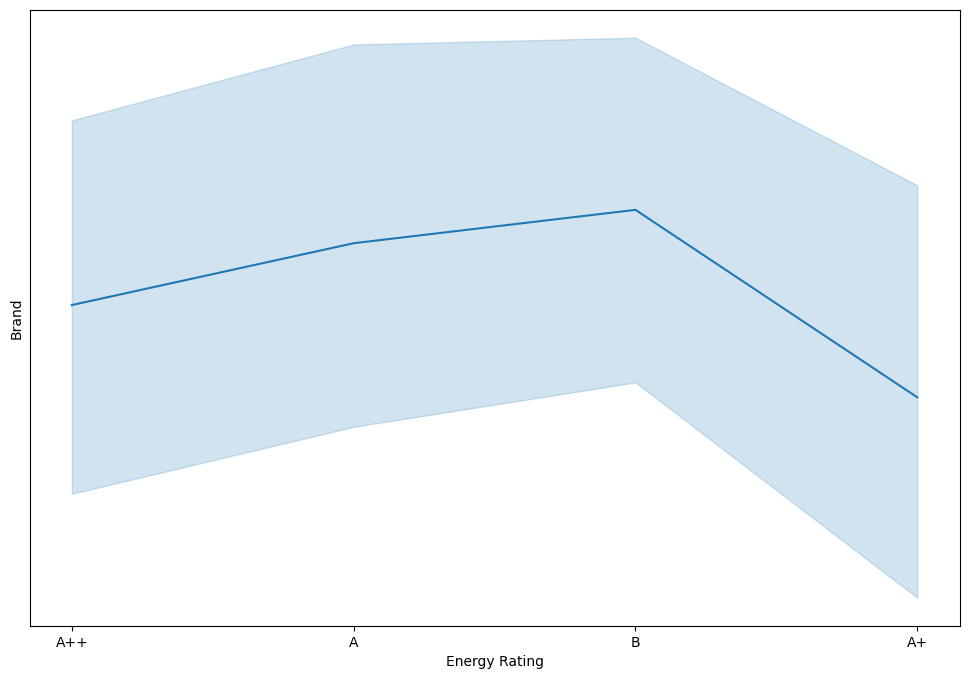

In [79]:
plt.figure(figsize=(12,8))
sns.lineplot(x='Energy Rating',y='Brand',data=df)
plt.show()

CONCLUSION


In [80]:
## (20000,11) Shape of the dataset.
## 2052 GE brand in the dataset.
## 3 types of fridge in data: side by side(6308), single door(6429), double door(6263).
## 3 types of feature are in data: Smart connectivity(4826), Ice Dispenser(4681), Water Dispenser(4719).
## There are four colors in fridge, white fridge are (4724), black fridge are (4695), Gray fridge are (4735), Silver fridge are(4846).
## There are 3 types of material in fridge = Plastic(33.5%), Glass(33.6%), Stainless Steel(32.6%).
## Most fridge have been manufacture in China (4827).




